<a href="https://colab.research.google.com/github/Bipin-6751/Machine-Learning-Collection/blob/master/Digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
plt.matshow(x_train[1])


In [ ]:
y_train # label of images in x_train


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)
x_train_flattened.shape
x_test_flattened.shape

(10000, 784)

In [ ]:
x_train_flattened[0]

simple sequential model with input nodes equal to input shape and output nodes of 10 outcomes

In [ ]:
model = keras.Sequential(
    [
     layers.Dense(10, input_shape=(784,), activation='sigmoid')
    ]
)
model.compile(optimizer=keras.optimizers.Adam(), 
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'],
              )

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 6s 2ms/step - loss: 0.4675 - accuracy: 0.8790
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3039 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2830 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2733 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2670 - accuracy: 0.9257


In [ ]:
model.evaluate(x_test_flattened, y_test)

 27/313 [=>............................] - ETA: 0s - loss: 0.2614 - accuracy: 0.9201 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 [==============================] - 1s 2ms/step - loss: 0.2667 - accuracy: 0.9257


[0.26665717363357544, 0.9257000088691711]

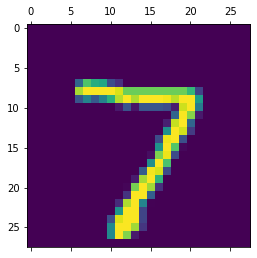

In [ ]:
plt.matshow(x_test[0])

In [ ]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

array([2.5206901e-02, 3.5862672e-07, 5.7743158e-02, 9.6098554e-01,
       2.9319238e-03, 1.0475175e-01, 1.8600944e-06, 9.9970007e-01,
       7.9134211e-02, 6.5829712e-01], dtype=float32)

In [ ]:
np.argmax(y_predicted[0])

7

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    5,    7,    2,    1,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   8,    9,  925,   15,    9,    3,   13,    8,   39,    3],
       [   4,    0,   19,  924,    0,   19,    4,   10,   24,    6],
       [   1,    1,    5,    0,  921,    0,   10,    3,   11,   30],
       [  10,    3,    2,   39,   12,  759,   20,    4,   38,    5],
       [  10,    3,    6,    1,    7,    8,  919,    2,    2,    0],
       [   2,    6,   24,    7,   10,    0,    0,  945,    3,   31],
       [   8,    8,    7,   20,    9,   16,   10,   11,  881,    4],
       [  11,    7,    1,   13,   38,    5,    0,   19,    8,  907]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

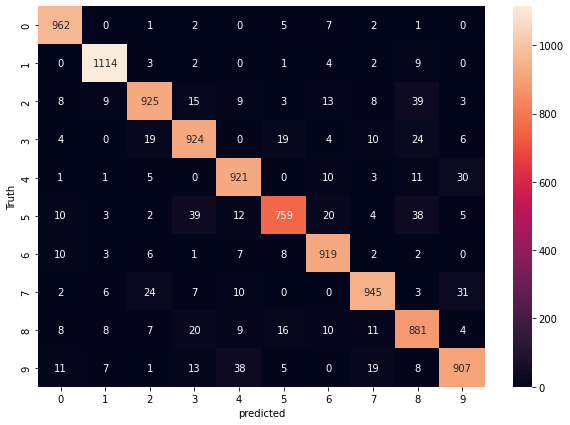

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

Adding hidden layer in the model

In [12]:
model = keras.Sequential(
    [
     layers.Dense(100, input_shape=(784,), activation='relu'),
     layers.Dense(10, activation='sigmoid')
    ]
)

tb_callback = tf.keras.callbacks.TensorBoard(log_dir='/content/logs', histogram_freq=1)

model.compile(optimizer=keras.optimizers.Adam(), 
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'],
              )

model.fit(x_train_flattened, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 6s 3ms/step - loss: 0.2700 - accuracy: 0.9235
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1233 - accuracy: 0.9643
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0870 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0671 - accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0537 - accuracy: 0.9834


In [11]:
%load_ext tensorboard
%tensorboard --log_dir /content/train

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
Error: A logdir or db must be specified. For example `tensorboard --logdir mylogdir` or `tensorboard --db sqlite:~/.tensorboard.db`. Run `tensorboard --helpfull` for details and examples.

In [ ]:
model.evaluate(x_test_flattened, y_test)

 16/313 [>.............................] - ETA: 1s - loss: 0.0494 - accuracy: 0.9824 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 [==============================] - 1s 3ms/step - loss: 0.0827 - accuracy: 0.9737


[0.08270815014839172, 0.9736999869346619]

Text(69.0, 0.5, 'Truth')

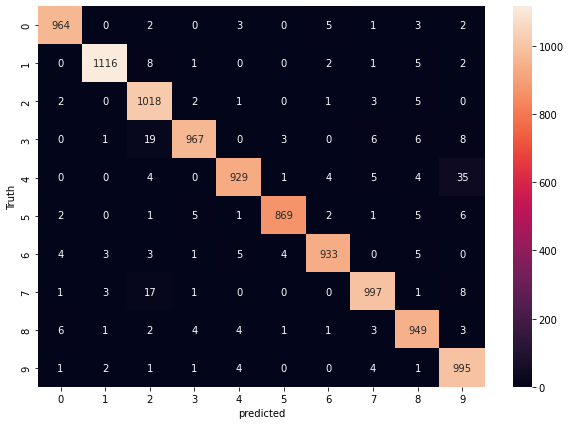

In [ ]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')
